In [1]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
import scipy.stats as sc
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
ibm=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# EmployeeCount variable is always equal to 1, so we can just drop it

ibm['EmployeeCount'].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

In [7]:
# Indeed, this is some kind of employee id. Should be also dropped

ibm['EmployeeNumber']

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

In [8]:
ibm[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']]

,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome
0,1102,94,19479,5993
1,279,61,24907,5130
2,1373,92,2396,2090
3,1392,56,23159,2909
4,591,40,16632,3468
...,...,...,...,...
1465,884,41,12290,2571
1466,613,42,21457,9991
1467,155,87,5174,6142
1468,1023,63,13243,5390


In [9]:
# Let's check the correlation between MonthlyRate and MonthlyIncome
# Although correlation is very low, p-value is not small enough to reject the hypothesys of correlation
# We don't have enough information to clearly understand the value of Rate variables, so we will drop them and use MonthlyIncome as a data of actual salaries

sc.pearsonr(ibm['MonthlyRate'], ibm['MonthlyIncome'])


PearsonRResult(statistic=0.034813626134121825, pvalue=0.18218959924708064)

In [10]:
# Deleting variables

ibm = ibm.drop(['DailyRate', 'HourlyRate', 'MonthlyRate', 'EmployeeNumber', 'EmployeeCount', 'Gender'], axis=1)
ibm.shape

(1470, 29)

In [11]:
ibm.select_dtypes(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Sales Executive,Married,Y,No


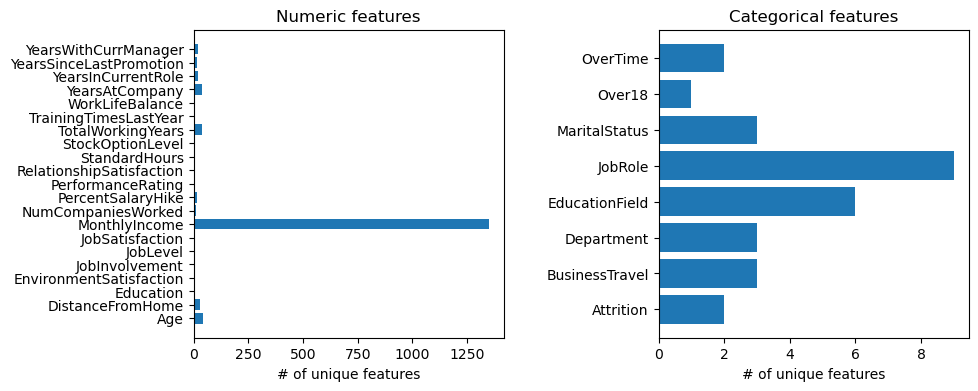

In [12]:
cat_features = ibm.select_dtypes(include=['object']).columns.values
num_features = ibm.select_dtypes(include=['int']).columns.values

fig, ax = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
ax[1].barh(cat_features, ibm[cat_features].nunique());
ax[1].set_xlabel('# of unique features')
ax[1].set_title('Categorical features')
ax[0].barh(num_features, ibm[num_features].nunique());
ax[0].set_xlabel('# of unique features')
ax[0].set_title('Numeric features')
plt.show();

In [13]:
ibm = ibm.loc[:, ibm.nunique() != 1]

In [14]:
ibm['BusinessTravel'] = ibm['BusinessTravel'].replace({'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 0})

In [15]:
features = ibm.select_dtypes(include=['object']).columns.values

for feature in features:
    print(f'{feature} unique values: {ibm[feature].unique()}')
    print('-------------------------------------')
    

Attrition unique values: ['Yes' 'No']
-------------------------------------
Department unique values: ['Sales' 'Research & Development' 'Human Resources']
-------------------------------------
EducationField unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-------------------------------------
JobRole unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
-------------------------------------
MaritalStatus unique values: ['Single' 'Married' 'Divorced']
-------------------------------------
OverTime unique values: ['Yes' 'No']
-------------------------------------


In [16]:
# Copying just in case
ibm_df = ibm.copy()

# We create two columns from one (since we have 2 categories)
ibm_df = pd.get_dummies(ibm_df, columns = ['OverTime'], dtype='int')

# We can delete unneccessary category to aviod redundancy
del ibm_df['OverTime_No']

# The same for Attrition
ibm_df = pd.get_dummies(ibm_df, columns = ['Attrition'], dtype='int')
del ibm_df['Attrition_No']

# And then do all other features
ibm_df = pd.get_dummies(ibm_df, columns = ['Department'], dtype='int')
ibm_df = pd.get_dummies(ibm_df, columns = ['EducationField'], dtype='int')
ibm_df = pd.get_dummies(ibm_df, columns = ['JobRole'], dtype='int')
ibm_df = pd.get_dummies(ibm_df, columns = ['MaritalStatus'], dtype='int')
ibm_df = pd.get_dummies(ibm_df, columns = ['BusinessTravel'], dtype='int')
ibm_df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2
0,41,1,2,2,3,2,4,5993,8,11,...,0,0,1,0,0,0,1,0,1,0
1,49,8,1,3,2,2,2,5130,1,23,...,0,1,0,0,0,1,0,0,0,1
2,37,2,2,4,2,1,3,2090,6,15,...,0,0,0,0,0,0,1,0,1,0
3,33,3,4,4,3,1,3,2909,1,11,...,0,1,0,0,0,1,0,0,0,1
4,27,2,1,1,3,1,2,3468,9,12,...,0,0,0,0,0,1,0,0,1,0


In [17]:
# We split our dataset to train and test. Usually it's done using 80/20 % of data
threshold = round(len(ibm_df)*0.8)
x_train, y_train = ibm_df.iloc[:threshold, :], ibm_df.iloc[:threshold, 22]
x_test, y_test = ibm_df.iloc[threshold:, :], ibm_df.iloc[threshold:, 22]

del x_train['Attrition_Yes']
del x_test['Attrition_Yes']

In [19]:
# Check that they don't overlap
print(len(x_train) + len(x_test) == len(ibm_df))
print(len(y_train) + len(y_test) == len(ibm_df))

True
True


In [20]:
# let's now try to use test_train_split function from Sklearn instead of doing it manually

x = ibm_df.drop('MonthlyIncome', axis=1)
y = ibm_df['MonthlyIncome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [21]:
# Let's try again
model = LinearRegression()
model.fit(x_train, y_train)

# Checking the score
model.score(x_train, y_train)

0.9448156073674743

In [22]:
# And try it on the test set
model.score(x_test, y_test)

0.9423504468149313

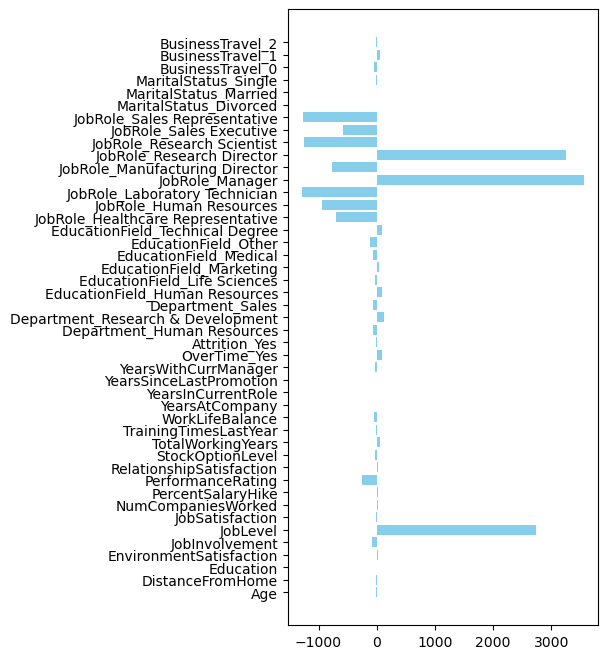

In [23]:
coeffs = model.coef_
features = x_train.columns.values
plt.figure(figsize=(4,8))
plt.barh(features, coeffs, color='skyblue');

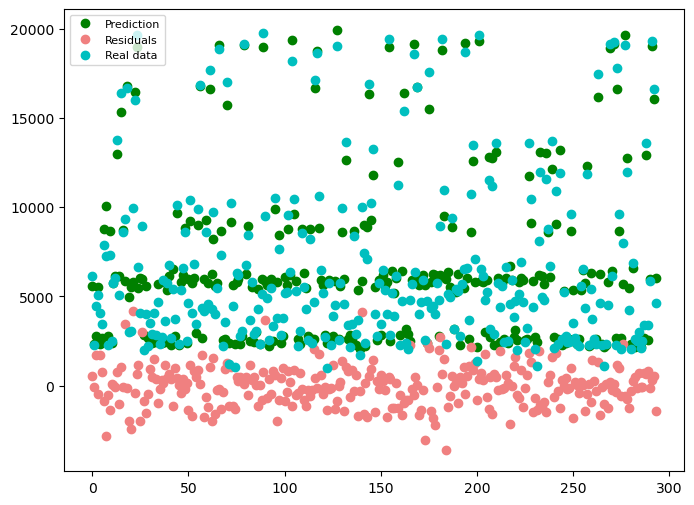

In [24]:
y_predict = model.predict(x_test)
residuals = y_test - y_predict

plt.figure(figsize=(8, 6))
plt.plot(y_predict, 'go', label='Prediction')
plt.plot(np.array(residuals), 'o', color='lightcoral', label='Residuals')
plt.plot(np.array(y_test), 'o', color='c', label='Real data')
plt.legend(['Prediction', 'Residuals', 'Real data'], loc='upper left', prop={'size': 8})
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, precision_recall_curve
x_train, x_test, y_train, y_test = train_test_split(ibm_df.drop('Attrition_Yes', axis=1), ibm_df['Attrition_Yes'], test_size=0.2, random_state=33)

# Using solver='lbfgs' option to implement regularization
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_test, y_test)

0.8809523809523809

In [26]:
col_1 = ['TP', 'FP']
col_2 = ['FN', 'TN']
table_data = [col_1] + [col_2]
print(tabulate(table_data, headers='firstrow', tablefmt='fancy_grid'))

╒══════╤══════╕
│ TP   │ FP   │
╞══════╪══════╡
│ FN   │ TN   │
╘══════╧══════╛


In [27]:
# Let's build a confusion matrix

y_pred = logreg.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

Confusion Matrix:
[[237   9]
 [ 26  22]]
Precision: 0.7096774193548387
Recall: 0.4583333333333333
F1: 0.5569620253164557


In [28]:
from sklearn.linear_model import LogisticRegressionCV
x_train, x_test, y_train, y_test = train_test_split(ibm_df.drop('Attrition_Yes', axis=1), ibm_df['Attrition_Yes'], test_size=0.2, random_state=33)

logreg = LogisticRegressionCV(max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_train, y_train)

0.8801020408163265

In [29]:
y_pred = logreg.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

Confusion Matrix:
[[241   5]
 [ 27  21]]
Precision: 0.8076923076923077
Recall: 0.4375
F1: 0.5675675675675675


In [32]:
x_train, x_test, y_train, y_test = train_test_split(ibm_df.drop('Attrition_Yes', axis=1), ibm_df['Attrition_Yes'], test_size=0.2, random_state=33)

logreg = LogisticRegressionCV(max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_train, y_train)

0.8801020408163265

In [33]:
# First, we predict the probabilities to obtain 1 or 0
# It gives us two arrays, we can take one of them
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate F1 score at each threshold
f1_scores = []
for i in range(len(thresholds)):
    score = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
    f1_scores.append(score)

# Find the threshold that maximizes recall and f1-score
max_recall = thresholds[np.argmax(recall)]
max_f1_score = thresholds[np.argmax(f1_scores)]

print("Threshold that maximizes recall:", max_recall)
print("Threshold that maximizes F1 score:", max_f1_score)

Threshold that maximizes recall: 0.0005903576222271125
Threshold that maximizes F1 score: 0.26454755699911087


In [34]:
# First we zip our data
data = zip(precision, recall, thresholds)

# And then concatenate to a new dataframe
model_scores = pd.DataFrame(data, columns=['Precision', 'Recall', 'Thresholds'])
model_scores

,Precision,Recall,Thresholds
0,0.163265,1.000000,0.000590
1,0.163823,1.000000,0.001021
2,0.164384,1.000000,0.002441
3,0.164948,1.000000,0.002541
4,0.165517,1.000000,0.003595
...,...,...,...
289,1.000000,0.104167,0.692812
290,1.000000,0.083333,0.757272
291,1.000000,0.062500,0.759786
292,1.000000,0.041667,0.784028


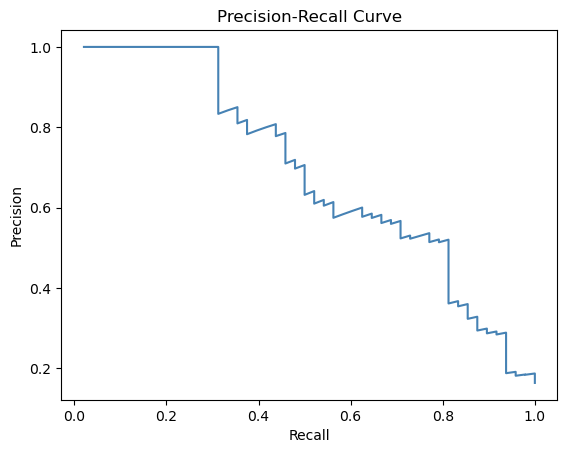

In [35]:
plt.plot(model_scores['Recall'], model_scores['Precision'], color='steelblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [36]:
# We can find index in our dataframe for max recall
print('index of max precision: ', model_scores['Precision'].idxmax())
# Or that way
print('index of max precision: ', np.argmax(precision))
# And its value:
print('Threshold of max precision: ', model_scores['Thresholds'][np.argmax(precision)])

index of max precision:  279
index of max precision:  279
Threshold of max precision:  0.5799565104227448


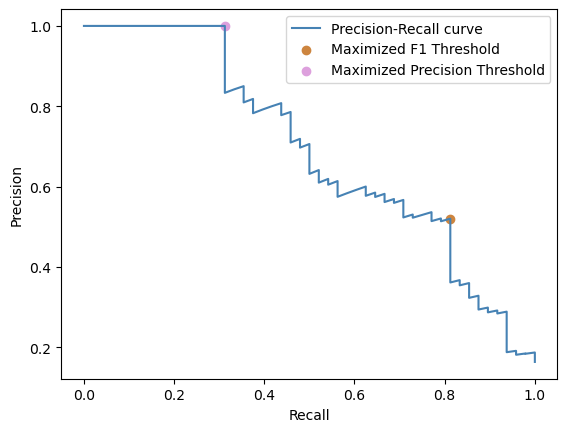

In [37]:
plt.plot(recall, precision, color='steelblue', label='Precision-Recall curve')
plt.scatter(recall[np.argmax(f1_scores)], 
            precision[np.argmax(f1_scores)], 
            color='peru', 
            label='Maximized F1 Threshold')
plt.scatter(recall[np.argmax(precision)], 
            precision[np.argmax(precision)],
            color='plum', 
            label='Maximized Precision Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()